In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/aapl_prices.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2021-01-04,125.97447967529297,130.0629768178639,123.39482930890424,129.97536966603926,143301900
2,2021-01-05,127.53199005126953,128.24262097829288,125.02048114625119,125.46827577350281,97664900
3,2021-01-06,123.23905181884766,127.570918733124,123.02489113823766,124.32932099883892,155088000
4,2021-01-07,127.4443588256836,128.13551641563382,124.46559750336911,124.95232359796171,109578200


In [3]:
pd.read_csv("../data/aapl_prices.csv", nrows=5, header=None)

,0,1,2,3,4,5
0,Date,Close,High,Low,Open,Volume
1,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
2,2021-01-04,125.97447967529297,130.0629768178639,123.39482930890424,129.97536966603926,143301900
3,2021-01-05,127.53199005126953,128.24262097829288,125.02048114625119,125.46827577350281,97664900
4,2021-01-06,123.23905181884766,127.570918733124,123.02489113823766,124.32932099883892,155088000


In [4]:
df = pd.read_csv("../data/aapl_prices.csv", skiprows=1)
df.head()

,Unnamed: 0,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4
0,2021-01-04,125.974480,130.062977,123.394829,129.975370,143301900
1,2021-01-05,127.531990,128.242621,125.020481,125.468276,97664900
2,2021-01-06,123.239052,127.570919,123.024891,124.329321,155088000
3,2021-01-07,127.444359,128.135516,124.465598,124.952324,109578200
4,2021-01-08,128.544418,129.109023,126.772727,128.914320,105158200


In [5]:
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1255 non-null   object 
 1   Open    1255 non-null   float64
 2   High    1255 non-null   float64
 3   Low     1255 non-null   float64
 4   Close   1255 non-null   float64
 5   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.0+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Open    1255 non-null   float64       
 2   High    1255 non-null   float64       
 3   Low     1255 non-null   float64       
 4   Close   1255 non-null   float64       
 5   Volume  1255 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB


In [9]:
df['daily_return'] = df['Close'].pct_change()
df[['Date', 'Close', 'daily_return']].head()

,Date,Close,daily_return
0,2021-01-04,129.975370,NaN
1,2021-01-05,125.468276,-0.034677
2,2021-01-06,124.329321,-0.009078
3,2021-01-07,124.952324,0.005011
4,2021-01-08,128.914320,0.031708


In [10]:
df['daily_return'].describe()

count    1254.000000
mean        0.000757
std         0.018164
min        -0.091535
25%        -0.007688
50%         0.000910
75%         0.010012
max         0.136163
Name: daily_return, dtype: float64

In [11]:
df['vol_30d'] = df['daily_return'].rolling(window=30).std()
df['vol_90d'] = df['daily_return'].rolling(window=90).std()

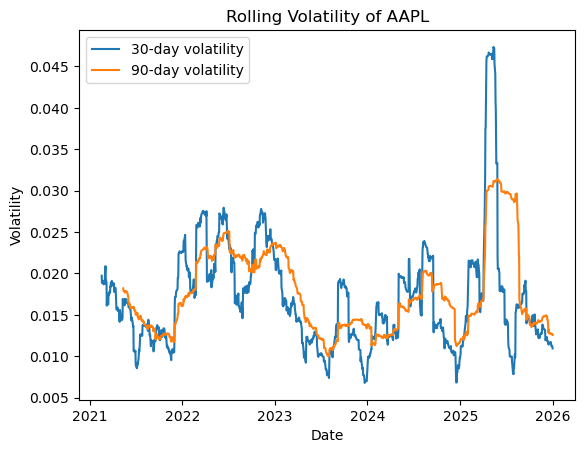

In [12]:
plt.figure()
plt.plot(df['Date'], df['vol_30d'], label='30-day volatility')
plt.plot(df['Date'], df['vol_90d'], label='90-day volatility')
plt.legend()
plt.title('Rolling Volatility of AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [13]:
df['cum_max'] = df['Close'].cummax()

In [14]:
df['drawdown'] = (df['Close'] - df['cum_max']) / df['cum_max']

In [15]:
max_drawdown = df['drawdown'].min()
max_drawdown

-0.3332853323707506

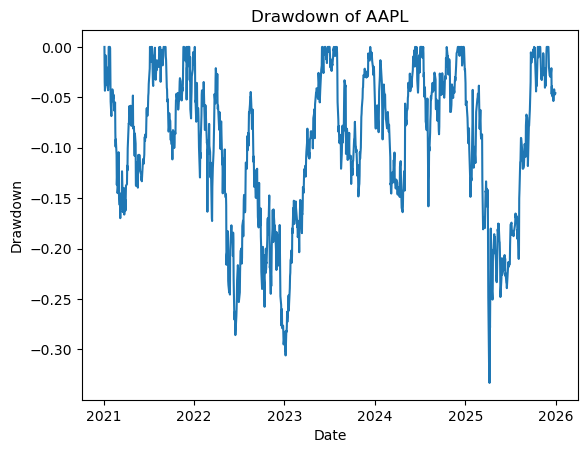

In [16]:
plt.figure()
plt.plot(df['Date'], df['drawdown'])
plt.title('Drawdown of AAPL')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()

**Maximum Drawdown:** approximately −33%, indicating the largest peak-to-trough loss observed during the period.

In [17]:
df['year_month'] = df['Date'].dt.to_period('M')

monthly_returns = (
    df.groupby('year_month')['Close']
      .apply(lambda x: x.iloc[-1] / x.iloc[0] - 1)
)

monthly_returns.head()

year_month
2021-01    0.017301
2021-02   -0.082070
2021-03   -0.016970
2021-04    0.065664
2021-05   -0.047385
Freq: M, Name: Close, dtype: float64

In [18]:
df['year'] = df['Date'].dt.year

yearly_returns = (
    df.groupby('year')['Close']
      .apply(lambda x: x.iloc[-1] / x.iloc[0] - 1)
)

yearly_returns

year
2021    0.342030
2022   -0.273715
2023    0.496652
2024    0.355473
2025    0.101896
Name: Close, dtype: float64

## Key Insights

- Apple (AAPL) demonstrates a positive long-term return with moderate daily volatility.
- Risk is not constant over time: rolling volatility highlights periods of elevated market stress.
- The maximum drawdown shows that even strong assets can experience significant temporary losses.
- Performance varies significantly across years and months, which is important for reporting and risk communication.

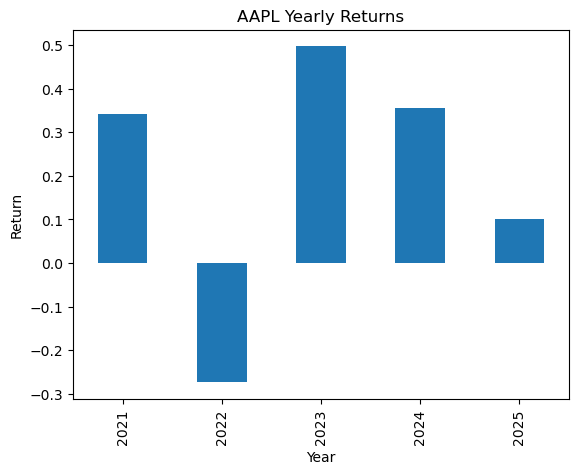

In [19]:
plt.figure()
yearly_returns.plot(kind='bar')
plt.title('AAPL Yearly Returns')
plt.ylabel('Return')
plt.xlabel('Year')
plt.show()